<a href="https://colab.research.google.com/github/ranisyafrila28/ai/blob/main/Computer_Vision_Kelompok_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mengambil dataset dari github
!git clone https://github.com/khoiruuuls/dataset-metal-defect-detection.git

Cloning into 'dataset-metal-defect-detection'...
remote: Enumerating objects: 8598, done.
remote: Total 8598 (delta 0), reused 0 (delta 0), pack-reused 8598
Receiving objects: 100% (8598/8598), 97.84 MiB | 19.69 MiB/s, done.
Updating files: 100% (8648/8648), done.


In [2]:
import cv2
import os

# Tentukan direktori tempat dataset Anda disimpan
defect_directory = '/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/def_front'
ok_directory = '/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/ok_front'

# Inisialisasi dua daftar kosong untuk gambar dan label
images = []
labels = []

# Fungsi untuk membaca dan memproses gambar dari direktori
def read_images_from_directory(directory, label):
    for image_name in os.listdir(directory):
        image_path = os.path.join(directory, image_name)
        image = cv2.imread(image_path)
        if image is not None:
            images.append(image)
            labels.append(label)

# Baca gambar dari direktori "def_front" dengan label "defect"
read_images_from_directory(defect_directory, label="defect")

# Baca gambar dari direktori "ok_front" dengan label "ok"
read_images_from_directory(ok_directory, label="ok")

# Sekarang, Anda memiliki daftar gambar (images) dan label (labels) dalam Python.


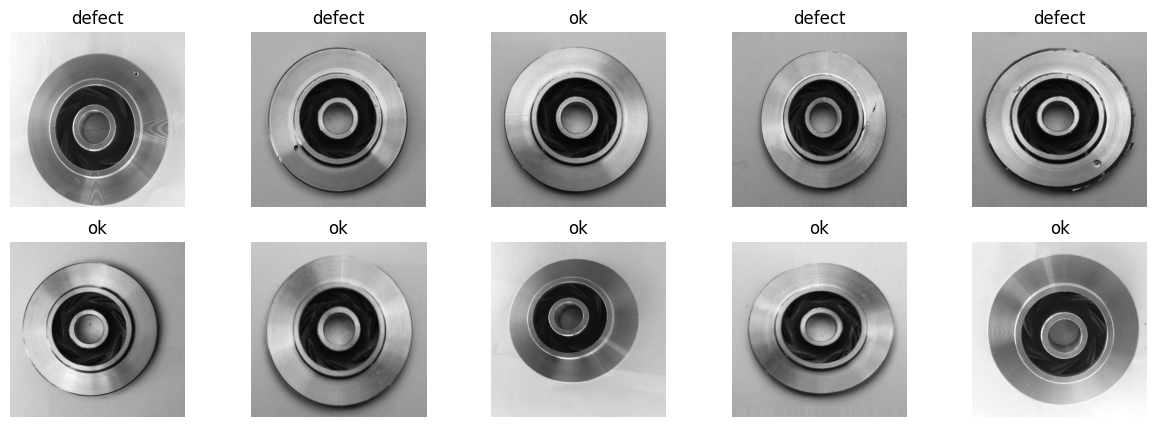

In [3]:
import cv2
import matplotlib.pyplot as plt
import random

# Menyatukan gambar dan label ke dalam satu daftar
image_label_pairs = list(zip(images, labels))

# Mengacak urutan gambar dan label
random.shuffle(image_label_pairs)

# Menentukan jumlah baris dan kolom sesuai jumlah gambar yang akan ditampilkan
num_rows = 2
num_cols = 5

# Menampilkan gambar dengan label "defect"
plt.figure(figsize=(15, 5))
for i, (img, label) in enumerate(image_label_pairs):
    if label == "defect":
        plt.subplot(num_rows, num_cols, i % (num_rows * num_cols) + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("defect")
        plt.axis("off")
    if i >= (num_rows * num_cols - 1):
        break

# Menampilkan gambar dengan label "ok"
for i, (img, label) in enumerate(image_label_pairs):
    if label == "ok":
        plt.subplot(num_rows, num_cols, i % (num_rows * num_cols) + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("ok")
        plt.axis("off")
    if i >= (2 * num_rows * num_cols - 1):
        break

plt.show()


In [4]:
import numpy as np


# Jumlah data total
total_samples = len(images)  # images adalah daftar gambar Anda

# Persentase pembagian (misalnya, 70% pelatihan, 15% validasi, 15% pengujian)
train_percent = 0.70
validation_percent = 0.15
test_percent = 0.15

# Hitung jumlah sampel untuk setiap bagian
num_train_samples = int(total_samples * train_percent)
num_validation_samples = int(total_samples * validation_percent)
num_test_samples = total_samples - num_train_samples - num_validation_samples

# Buat indeks acak untuk membagi data
indices = np.random.permutation(total_samples)

# Bagi dataset menjadi tiga bagian
train_images = [images[i] for i in indices[:num_train_samples]]
train_labels = [labels[i] for i in indices[:num_train_samples]]

validation_images = [images[i] for i in indices[num_train_samples:num_train_samples + num_validation_samples]]
validation_labels = [labels[i] for i in indices[num_train_samples:num_train_samples + num_validation_samples]]

test_images = [images[i] for i in indices[num_train_samples + num_validation_samples:]]
test_labels = [labels[i] for i in indices[num_train_samples + num_validation_samples:]]

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np

# Konversi daftar gambar dan label menjadi array NumPy
x_train = np.array(train_images)
y_train = np.array(train_labels)

x_validation = np.array(validation_images)
y_validation = np.array(validation_labels)

x_test = np.array(test_images)
y_test = np.array(test_labels)

# Konversi label-label teks menjadi bilangan bulat
y_train = [0 if label == 'ok' else 1 for label in y_train]
y_validation = [0 if label == 'ok' else 1 for label in y_validation]
y_test = [0 if label == 'ok' else 1 for label in y_test]

# Konversi label-label ke tipe data float
y_train = np.array(y_train).astype(float)
y_validation = np.array(y_validation).astype(float)
y_test = np.array(y_test).astype(float)

# Define and compile the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification: defect or not
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=6, validation_data=(x_validation, y_validation))

# Save the model
model.save('/content/defect_detection_model.h5')

Epoch 1/6
29/29 [==============================] - 461s 16s/step - loss: 2340.5852 - accuracy: 0.5985 - val_loss: 6.3049 - val_accuracy: 0.5641
Epoch 2/6
29/29 [==============================] - 446s 15s/step - loss: 3.0612 - accuracy: 0.6293 - val_loss: 0.8448 - val_accuracy: 0.6769
Epoch 3/6
29/29 [==============================] - 454s 16s/step - loss: 0.3237 - accuracy: 0.8603 - val_loss: 0.5695 - val_accuracy: 0.7487
Epoch 4/6
29/29 [==============================] - 446s 15s/step - loss: 0.1314 - accuracy: 0.9615 - val_loss: 0.5547 - val_accuracy: 0.7949
Epoch 5/6
29/29 [==============================] - 432s 15s/step - loss: 0.0806 - accuracy: 0.9846 - val_loss: 0.6398 - val_accuracy: 0.7692
Epoch 6/6
29/29 [==============================] - 431s 15s/step - loss: 0.0432 - accuracy: 0.9956 - val_loss: 0.6351 - val_accuracy: 0.7897


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Make predictions on the test data
predictions = model.predict(x_test)

# Threshold the predictions to get binary results (defect or not)
threshold = 0.5  # You can adjust this threshold
binary_predictions = (predictions > threshold).astype(int)

# Evaluate the binary predictions (you can use various metrics)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
f1 = f1_score(y_test, binary_predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

7/7 [==============================] - 28s 4s/step - loss: 0.5083 - accuracy: 0.8214
Test accuracy: 0.8214285969734192
7/7 [==============================] - 24s 3s/step
Accuracy: 0.8214285714285714
Precision: 0.8738738738738738
Recall: 0.8220338983050848
F1 Score: 0.8471615720524017


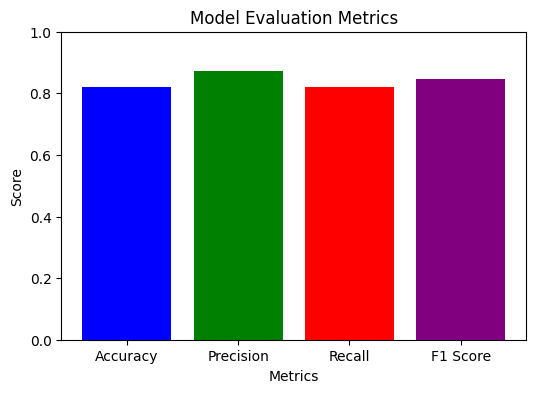

In [7]:
import matplotlib.pyplot as plt

# Define the metrics and their values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1.0)  # Set the y-axis limit to the range [0, 1]
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()


1/1 [==============================] - 0s 213ms/step
Hasil: Defect
Probabilitas Defect: 0.5025380849838257
Probabilitas No Defect: 0.4974619150161743


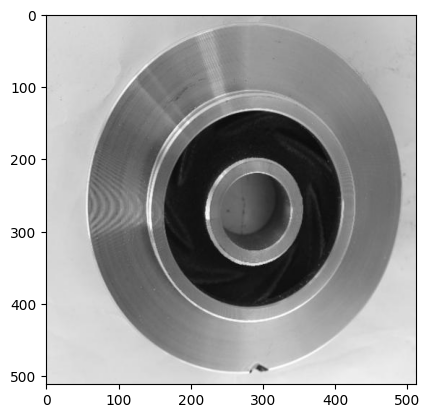

In [8]:
import cv2
import numpy as np

# Membaca gambar yang akan diuji
# image = cv2.imread('/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/def_front/cast_def_0_2515.jpeg')  # Terbaca Defect
image = cv2.imread('/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/def_front/cast_def_0_1112.jpeg')  # Terbaca Tidak Defect, Padahal Defect
# image = cv2.imread('/content/dataset-metal-defect-detection/casting_512x512/casting_512x512/ok_front/cast_ok_0_2472.jpeg')  # Hasil Tidak Defect

# Pastikan ukuran gambar sesuai dengan model Anda (512x512)
image = cv2.resize(image, (512, 512))

# Ubah gambar ke format yang sesuai (misalnya, float32)
image = image.astype(np.float32) / 255.0

# Lakukan prediksi menggunakan model
prediction = model.predict(np.expand_dims(image, axis=0))[0]

# Ambil probabilitas hasil positif (defect)
defect_probability = prediction[0]

# Ambil probabilitas hasil negatif (tidak defect)
no_defect_probability = 1.0 - defect_probability

# Menentukan threshold untuk mengklasifikasikan hasil
threshold = 0.5  # Anda dapat menyesuaikan threshold sesuai kebutuhan

if defect_probability >= threshold:
    result = "Defect"
else:
    result = "No Defect"

# Menampilkan data hasil
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print(f"Hasil: {result}")
print(f"Probabilitas Defect: {defect_probability}")
print(f"Probabilitas No Defect: {no_defect_probability}")
